In this project, you will analyze the PlantGrowth R dataset. You will find a short description of it on Vicent Arel-Bundock's Rdatasets page. The dataset contains two main variables, a treatment group and the weight of plants within those groups.

Your task is to perform t-tests and ANOVA on this dataset while describing the dataset and explaining your work. In doing this you should:

Download and save the dataset to your repository.

Describe the data set in your notebook.

Describe what a t-test is, how it works, and what the assumptions are.

Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

#### Importing Required Libraries

In [304]:
## Mathematical functions from the standard library
# https://docs.python.org/3/library/math.html  
import math 

## Numerical structures and operations
# https://numpy.org/doc/stable/reference/index.html  
import numpy as np 

## Plotting
# https://matplotlib.org/stable/contents.html  
import matplotlib.pyplot as plt

## Random selections
# https://docs.python.org/3/library/random.html  
import random

## Permutations and combinations
# https://docs.python.org/3/library/itertools.html  
import itertools

import pandas as pd

### Statistics
import scipy.stats as stats  
import seaborn as sns 
import statistics

## 1 Downloading and saving the required dataset

The dataset used for this project is the [PlantGrowth R dataset](https://vincentarelbundock.github.io/Rdatasets/index.html). 
This PlantGrowth dataset contains the information recorded on plant growth under certain conditions. The dataset is comprised of two main variables, a treatment group (ctrl, trt1 and trt2) and the weight of plants within those groups.  
The dataset was originally sourced in Dobson's An Introduction to Statistical Modelling (1983).  
The dataset is contained in the PlantGrowth.csv file in the [AppliedStatistics repository](https://github.com/rebeccaf1918/AppliedStatistics/blob/main/PlantGrowth.csv) by Rebecca Feeley.

## 2 Description of the Dataset

In [305]:
# loading in dataset and printing out the first 5 rows
data = pd.read_csv('PlantGrowth.csv')
print(data.head())

   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl


In [306]:
# Now I will conduct basic summary analysis of the dataset
print(data.shape)
print(data['group'].value_counts()) # determining how many values are in each group

# Inspecting the dataset for any missing values - if the output is false it means there are no missing values
data.isnull().any()

(30, 3)
group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64


rownames    False
weight      False
group       False
dtype: bool

The PlantGrowth dataset, which I have loaded into a pandas dataframe, contains 30 instances of 2 columns (a column being the weight as dried weight of plant and a column showing the group used in the experiment). The group category contains 10 instanees per group (one control and two treatment groups).   
The yields of plant growth for the two treatment conditions were compared against a control in the experiment conducted. There is a numerical vairable i,e the weight (float64) and a categorical variable i.e the group (object).   
For clarity sake, I have chosen to remove the rownames column as there is an index included in the data and this column holds no additional data beyond the index.


In [307]:
data.drop('rownames',
  axis='columns', inplace=True)


# checking that the deletion operation was done correctly
data.head()


,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


Now, I am using the head() and tail() functions to display the first 5 lines of the  data set and the last 5 lines of the  data set. This allows us to see the column names of the data, how many columns are in the data, and a general overview of the top and bottom of the dataset.

In [308]:
data.head()

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


In [309]:
data.tail()

,weight,group
25,5.29,trt2
26,4.92,trt2
27,6.15,trt2
28,5.80,trt2
29,5.26,trt2


In [310]:
data.info() # this is a useful function in pandas which summarises the above info in one function output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  30 non-null     float64
 1   group   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


In [311]:

data.describe() # using the describe function to determine various characteristics incl the mean, std deviation and more



,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


In [312]:
data.groupby('group').describe()  #generating the summary statistics by group to see if any trends occur due to group type

weight                                                    
       count   mean       std   min     25%    50%     75%   max
group                                                           
ctrl    10.0  5.032  0.583091  4.17  4.5500  5.155  5.2925  6.11
trt1    10.0  4.661  0.793676  3.59  4.2075  4.550  4.8700  6.03
trt2    10.0  5.526  0.442573  4.92  5.2675  5.435  5.7350  6.31

### Visual Analysis

In order to better understand the dataset, I will now conduct analysis of the data using visualisation methods to gain a better insight. I will create a boxplot, scatter plot and histogram to visual and better understand the dataset.  

I will firstly create a histogram which is categorised by group and allows me to visualise the distribution of the data and then I will create a boxplot and violin plot of the groups which allows me to more easily compare the results based on the group the plant is categorised within.


### Histogram
Histograms are useful for visualising the distribution of a single variable - in this case we can easily see the distribution of the weight of each plant of the different groups (control, treatment1 and treament 2)

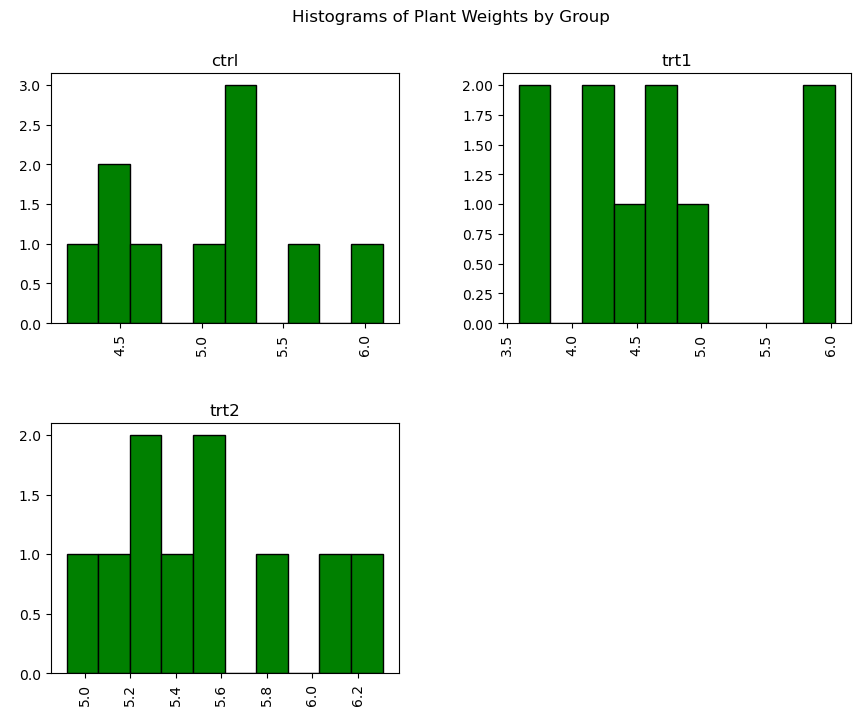

In [313]:
data.hist(column='weight', by='group', bins=10, color= 'green', edgecolor='black', figsize=(10, 8))
plt.suptitle('Histograms of Plant Weights by Group')
plt.subplots_adjust(top=0.9, hspace=0.4)
plt.show()

### Boxplot
Next, I will create a boxplot based on the dataset. Boxplots have many useful functions, in particular it allows us to visualise the different in the plant weights across each of the groups and it makes the central tendency of the plant growth more distinguishable.

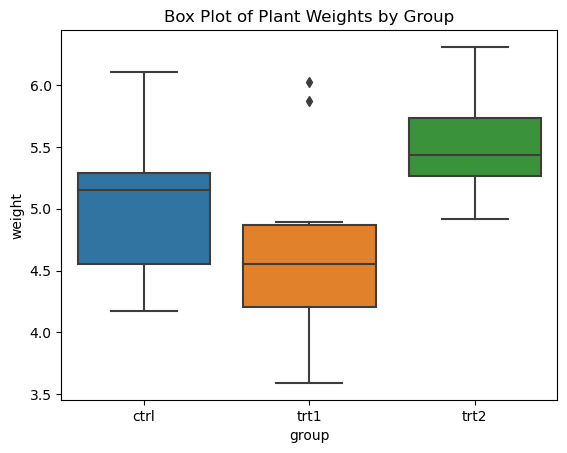

In [314]:
sns.boxplot(x='group', y='weight', data=data)
plt.title('Box Plot of Plant Weights by Group')
plt.show()

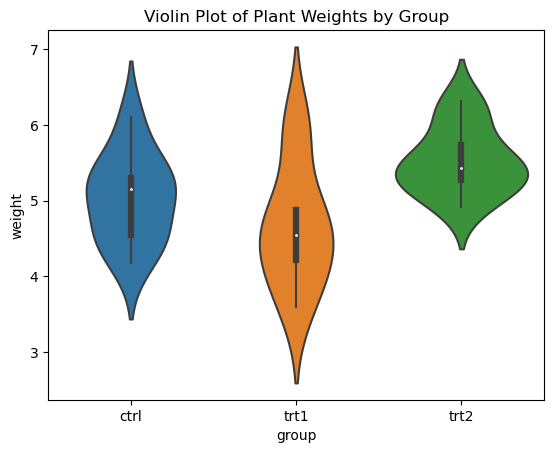

In [315]:
sns.violinplot(x='group', y='weight', data=data)
plt.title('Violin Plot of Plant Weights by Group')
plt.show()


## Describe what a t-test is, how it works, and what the assumptions are.

A t test is a statistical test which is used to determine whether or not there is a significant diferrence between two samples. It does this by comparing the means of two groups and determining if the means are significantly different. It is particularly useful for determining if the differences in the means are due to chance or whetehr they are statistically significant.
The t test was originally developed by [William Seely Gosset](https://www.scientificamerican.com/article/how-the-guinness-brewery-invented-the-most-important-statistical-method-in/) who worked for the Guinness Brewing Company and developed the t test as part of his goal of measuring the quality of stout produced. He published his t test in 1908 under the psudynom 'Student' so as not to tip of competitors of his findings.
The t test has since become one of the cornerstones of modern statistical analysis and is often used in hypothesis testing to determine whether a particular treatment or process has any actual effect on a group, e.g a control vs a treatment group. It is also often used to determine whether two groups are different from one another.  
The t test is most commonly used when the data is normally distributed but the population variance is unknown.
The t test looks at the means of two groups, and then calculates a t-statistic. This t statistic is used to determine if the null hypothesis is true or false. (The null hypothesis is that there is no significant differnce between the means of the two groups.)
It then uses the resulting p-value to decide if the difference is statistically significant based on a chosen threshold (this threshold is often 0.05)

There are 3 main types of t test:  
One-sample t-test: Tests the mean of a single group to a known value or population mean.
Two-sample t-test (Independent t-test): Tests the means of two independent, separate groups.
Paired Sample t-test: Tests means from the same group at differing times (e.g., before and after a treatment).

For the purposes of analysis of the PlantGrowth dataset, I will be conducting a Two-sample T-test (Independent t-test) as the there are two independent groups (i.e different plant groups) and the treatment provided has not used just one plant sample (i.e two separate treament groups/plant groups)

### Assumptions required to carry out a t test
In order for a t test to be carried out correctly, and to ensure that the results of any t test are valid, several assumptions must be met.  
These assumptions can differ based on the particular type of t test used. As I will be utilising a Two-sample t test (Independent t test), I will focus on the assumptions required for this t test:  
The two samples must be indpendent of each other.   
The dependent variable should be continuous in nature  
The independent variables should be categorical in nature and independent of each other  
The data in each group should be normally distributed  
Each sample must be randomly sampled from the respective populations.  
The variences of the two groups should be equal (homogeneity of variances)  

If these assumptions are not accurate for the data used in a t test, then other methods of analysis must be used as the t test result will not prove to be reliable or accurate.


## Performing a t test

In order to perform a t test in this case, I will first ensure that the assumptions are met in this case and I will also set out what the null hypothesis is.
Firstly, the two treatment groups are independent of each other (i.e contain separate plant samples) and they are also categorical in nature (i.e treatment1 or treatment2). The dependent variable (i.e weight) is continuous in nature and the sample is randomly generated, and the variances of the two groups are equal. The main thing which we need to ensure is that the data is normally distributed. Due to the small sample size, it is not immediately apparent if the data is normally distributed.  
Thus, I will utilise a statistical analysis test to check whether the data is normally distributed.

### Verifying the data is normally distributed
The Shapiro Wilk Test operates on the basis of the null hypothesis that the data follows a normal distribution. The p-value is a probability value which helps us to determine whether or not to reject the null hypothesis. The p-value also ranges from 0 to 1.
If the p-value is greater than 0.05, this means that we do not reject the null hypothesis, which indicates that the data sample is likely to have a normal distribution.

I will use the scipy.stats.shapiro() function to carry out this test on the PlantGrowth dataset.

In [316]:
# Check normal distribution with Shapiro-Wilk test
groups = data['group'].unique()  # Get group names
# Carry out shapiro test for each group
print("Shapiro-Wilk Test Results are:")
for group in groups:
    group_data = data[data['group'] == group]['weight']
    shapiro_test = stats.shapiro(group_data)
    print(f"Test Statistic of {group}: {shapiro_test.statistic:.6f}")
    print(f"P-value of {group}: {shapiro_test.pvalue:.6f}")


Shapiro-Wilk Test Results are:
Test Statistic of ctrl: 0.956682
P-value of ctrl: 0.747474
Test Statistic of trt1: 0.930411
P-value of trt1: 0.451946
Test Statistic of trt2: 0.941005
P-value of trt2: 0.564253


Thus, as we can see from the above results, for all three groups the p-values are above 0.05. This means we cannot reject the null hypothesis and so can consider the data to follow a normal distribution. This confirms the requirement to have normally distributed data to perform an accurate t-test.

### Peforming a t test on the PlantGrowth data between the two treatment groups
The null hypothesis for this t test is that there is no statistically significant difference in the means of the two plant treatment group weights.

In [317]:
# Performing an independent sample t-test for trt1 and trt2 groups using scipy t-test function
result = stats.ttest_ind(data[data['group'] == 'trt1']['weight'],data[data['group'] == 'trt2']['weight']) 
print(f"T-test result is {result}")

T-test result is TtestResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574, df=18.0)


As the resulting p-value is 0.007518426, this is much lower the the significance level of 0.05. Thus, we can safely reject the null hypothesis. This means that the t test has determined that there is a statistically significant differnce between the mean weight yields of each treatment group.